In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
train = pd.read_csv('/content/train.csv')

In [5]:
train_original=train.copy()

In [6]:
train.shape

(7920, 3)

In [7]:
train_original

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


In [9]:
test = pd.read_csv('/content/test.csv', encoding='unicode_escape')

In [10]:
test_original=test.copy()

In [11]:
test.shape

(2668, 3)

In [12]:
test_original

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
2663,2664,0,This is what happens when @eilidhpat0nn_ gets ...
2664,2665,1,We went in to get an ipod screen fixed and we ...
2665,2666,0,Santa Claus has come to our town And you what ...
2666,2667,0,Here I'm come #game #sony #ps3 #cod #bo2 #fps ...


In [13]:
combine = train.append(test,ignore_index=True,sort=True)

<ipython-input-13-59a7f2ca9e55>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test,ignore_index=True,sort=True)


In [14]:
combine.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [15]:
combine.tail()

,id,label,tweet
10583,2664,0,This is what happens when @eilidhpat0nn_ gets ...
10584,2665,1,We went in to get an ipod screen fixed and we ...
10585,2666,0,Santa Claus has come to our town And you what ...
10586,2667,0,Here I'm come #game #sony #ps3 #cod #bo2 #fps ...
10587,2668,0,Follow @capetownsup on Instagram http://mf.tt/...


In [16]:
def remove_pattern(text,pattern):

    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)

    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)

    return text


In [17]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [18]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-18-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


In [19]:
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy for us #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http www ebay c...
8,9,0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera...


In [20]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked phone time Stupi...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy #instapic #instadaily #sony #xperia #xpe...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,Type charger cable http ebay #bay #Amazon #ets...
8,9,0,Bout to go shopping again listening to music #...,Bout shopping again listening music #iphone #j...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera ...


In [21]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: Tidy_Tweets, dtype: object

In [22]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: Tidy_Tweets, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


In [24]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [25]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

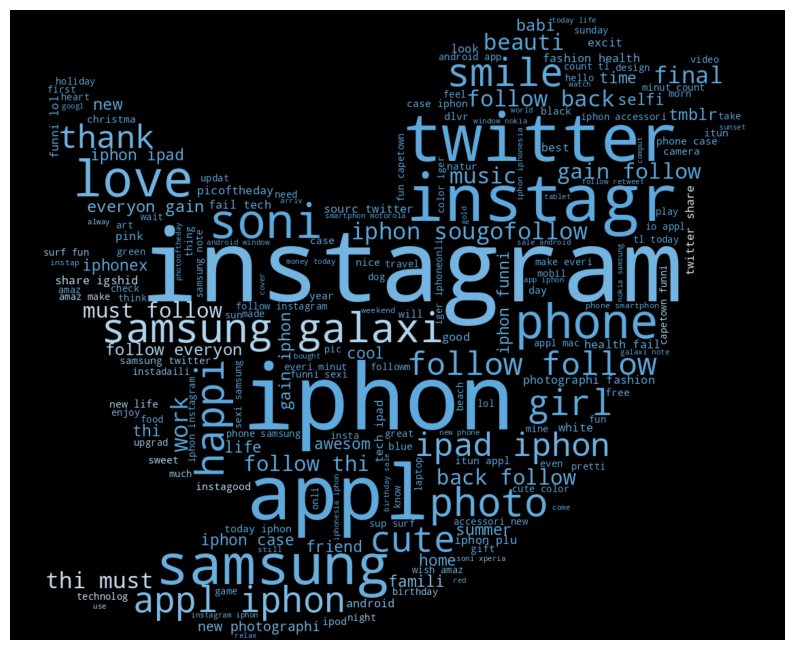

In [26]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [27]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

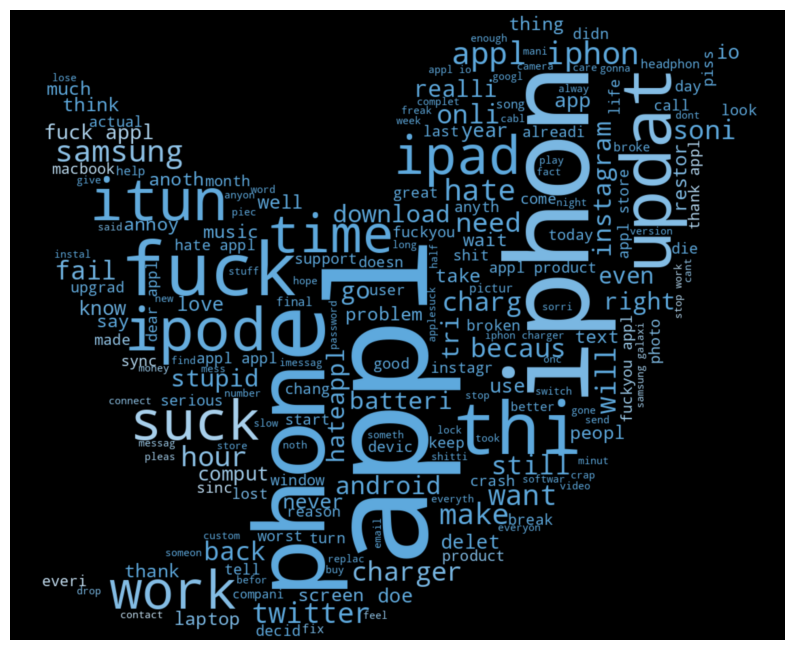

In [28]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [29]:
def Hashtags_Extract(x):
    hashtags=[]

    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [30]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

In [31]:
ht_positive_unnest = sum(ht_positive,[])

In [32]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

In [33]:
ht_negative_unnest = sum(ht_negative,[])

In [34]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'iphon': 4269, 'appl': 1839, 'samsung': 1631, 'soni': 966, 'new': 658, 'ipad': 483, 'android': 430, 'life': 422, 'photographi': 399, 'cute': 393, ...})

In [37]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [38]:
df_positive.head(10)

,Hashtags,Count
0,fingerprint,7
1,pregnanc,2
2,android,430
3,app,258
4,beauti,376
5,cute,393
6,health,160
7,iger,198
8,iphoneonli,167
9,iphonesia,182


In [39]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

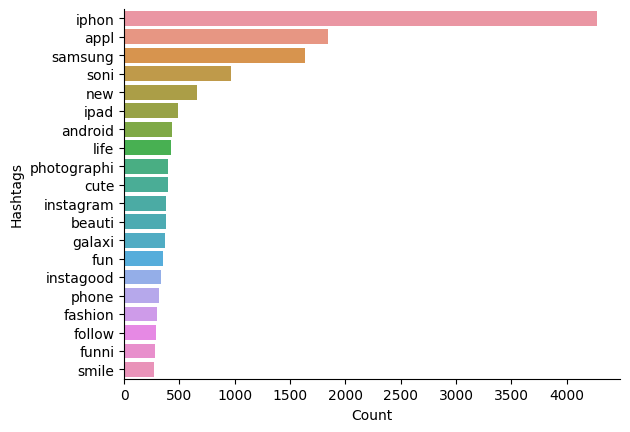

In [40]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [41]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [42]:
word_freq_negative

FreqDist({'appl': 1037, 'iphon': 336, 'samsung': 99, 'fuckyou': 88, 'io': 85, 'soni': 84, 'hateappl': 68, 'fail': 66, 'suck': 54, 'ipad': 45, ...})

In [43]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [44]:
df_negative.head(10)

,Hashtags,Count
0,appl,1037
1,drinkyourhaterad,2
2,cellcom,2
3,depress,3
4,idontwantto,2
5,hateorang,3
6,iphon,336
7,suck,54
8,truth,3
9,truthbetold,2


In [45]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

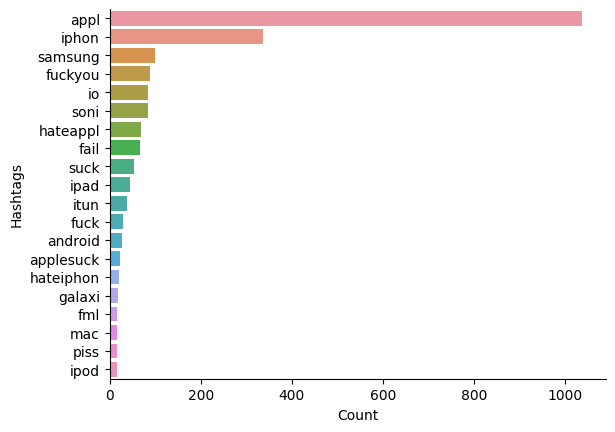

In [46]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [50]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')